In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("Lab 3 Dataset.csv", skiprows=4)

print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| Country Name                | Country Code   | Indicator Name    | Indicator Code   | 1960        | 1961        | 1962        | 1963        | 1964        | 1965        | 1966        | 1967        | 1968        | 1969        | 1970        | 1971        | 1972        | 1973        | 1974        | 1975        | 1976        | 1977        | 1978        | 1979        | 1980        | 1981        | 1982        | 1983        | 1984        | 1985        | 1986        | 1987        | 1988        | 1989        | 1990        | 1991        | 1992        | 1993        | 1994        | 1995        | 1996        | 1997        | 1998        | 1999        | 2000        | 2001        | 2002        | 2003        | 2004        | 2005        | 2006        | 2007        | 2008        | 2009        | 2010        | 2011        | 2012        | 2013        | 2014        | 2015        | 2016        | 2017        | 2018        | 2019        | 2020        | 2021        | 2022        | 2023   | Unnamed: 68   |
|:---

In [49]:
clean_df = df.drop(columns=['2023', 'Unnamed: 68'])
clean_df = clean_df[clean_df['Indicator Name'] == 'Population, total'].copy()

selected_country = 'Japan'
df_country = clean_df[clean_df['Country Name'] == selected_country].copy()

df_country_t = df_country.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']).T
df_country_t = df_country_t.iloc[1:].copy()
df_country_t = df_country_t.reset_index()
df_country_t.columns = ['Year', 'Population']
df_country_t['Year'] = pd.to_numeric(df_country_t['Year'])
df_country_t['Population'] = pd.to_numeric(df_country_t['Population'], errors='coerce')
df_country_t.dropna(inplace=True)

print(df_country_t.head())
print(df_country_t.info())

   Year  Population
0  1961   4751507.0
1  1962   4890425.0
2  1963   5034334.0
3  1964   5183283.0
4  1965   5337351.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        62 non-null     int64  
 1   Population  62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None


In [50]:
scaler = StandardScaler()
df_country_t[['Year', 'Population']] = scaler.fit_transform(df_country_t[['Year', 'Population']])

X = []
y = []
sequence_length = 3  

for i in range(len(df_country_t) - sequence_length):
    X.append(df_country_t['Population'][i:i+sequence_length])
    y.append(df_country_t['Population'][i+sequence_length])

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(sequence_length,)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01))

])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, validation_split=0.25)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('RMSE:', rmse)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.5512 - val_loss: 0.2108
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - loss: 0.3930 - val_loss: 0.2116
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.3751 - val_loss: 0.2121
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.4632 - val_loss: 0.2121
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.2761 - val_loss: 0.2120
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3172 - val_loss: 0.2122
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.3335 - val_loss: 0.2122
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.2023 - val_loss: 0.2123
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 0.2753 - val_loss: 0.2123
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 0.2195 - val_loss: 0.2121
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.1976 - val_loss: 0.2121
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.1495

Text(0.5, 1.0, 'Actual vs. Predicted Population')

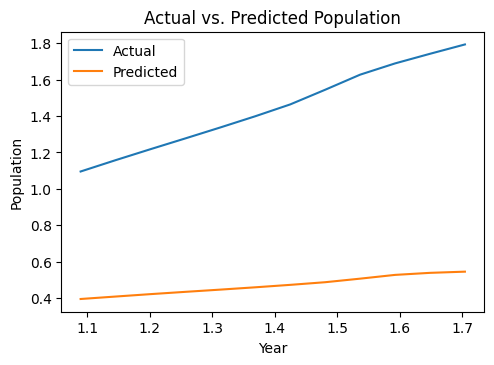

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# 1. Line Chart
plt.subplot(2, 2, 1)
plt.plot(df_country_t['Year'][-len(y_test):], y_test, label='Actual')
plt.plot(df_country_t['Year'][-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.title('Japan Actual vs. Predicted Population')



In [52]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_country_t['Year'][-len(y_test):], y=y_test,
                    mode='lines', name='Actual', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=df_country_t['Year'][-len(y_test):], y=y_pred.flatten(),
                    mode='lines', name='Predicted', line=dict(color='orange'),
                    yaxis='y2'))  

fig.update_layout(
    title='Japan Actual vs. Predicted Population Growth (Dual Y-Axes)',
    xaxis_title='Year',
    yaxis_title='Actual Population',
    yaxis2=dict(title='Predicted Population', overlaying='y', side='right')  
)

fig.show()
